In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression
from math import sqrt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

import env
import acquire
import split_scale
import features
import model

In [2]:
df = acquire.acquire_zillow()
df.head()

,bedroom,bathroom,square_feet,tax_amount,home_value,property_type,fips
0,3,2.0,1458,2319.90,136104,Single Family Residential,6037
1,2,1.0,1421,543.69,35606,Single Family Residential,6037
2,3,2.0,1650,7673.19,614000,Single Family Residential,6037
3,2,1.0,693,3267.47,274237,Single Family Residential,6037
4,3,2.0,1108,5990.50,486866,Single Family Residential,6037


In [3]:
df['tax_rate'] = df['tax_amount']/df['home_value']
df.head()

,bedroom,bathroom,square_feet,tax_amount,home_value,property_type,fips,tax_rate
0,3,2.0,1458,2319.90,136104,Single Family Residential,6037,0.017045
1,2,1.0,1421,543.69,35606,Single Family Residential,6037,0.015270
2,3,2.0,1650,7673.19,614000,Single Family Residential,6037,0.012497
3,2,1.0,693,3267.47,274237,Single Family Residential,6037,0.011915
4,3,2.0,1108,5990.50,486866,Single Family Residential,6037,0.012304


In [4]:
df['county_name'] = df['fips'].map({6037: "Los_Angeles_County", 6059: "Orange_County", 6111: "Ventura_County"})
df.head()
df_county = df[['fips', 'county_name','tax_rate']]
df_county.head()

,fips,county_name,tax_rate
0,6037,Los_Angeles_County,0.017045
1,6037,Los_Angeles_County,0.015270
2,6037,Los_Angeles_County,0.012497
3,6037,Los_Angeles_County,0.011915
4,6037,Los_Angeles_County,0.012304


In [5]:
df_county.groupby('county_name').fips.count()

county_name
Los_Angeles_County    9517
Orange_County         4084
Ventura_County        1291
Name: fips, dtype: int64

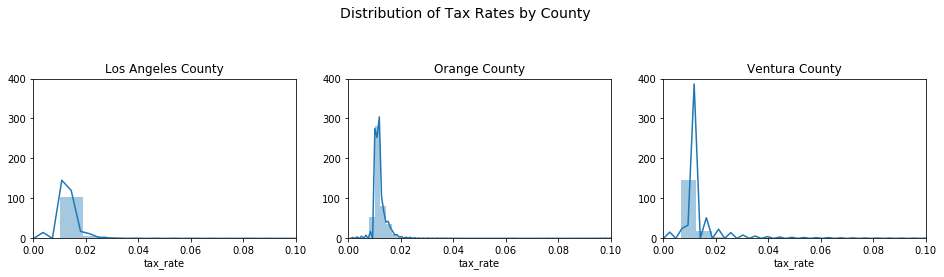

In [6]:
la = df_county[df_county.county_name == "Los_Angeles_County"].tax_rate
oc = df_county[df_county.county_name == "Orange_County"].tax_rate
v = df_county[df_county.county_name == "Ventura_County"].tax_rate

plt.figure(figsize=(16, 10))
plt.suptitle("Distribution of Tax Rates by County", fontsize=14)
plt.subplot(331)
sns.distplot(la, bins=50)
plt.xlim(0, .10)
plt.ylim(0, 400)
plt.title("Los Angeles County")
plt.subplot(332)
sns.distplot(oc, bins=50)
plt.xlim(0, .10)
plt.ylim(0, 400)
plt.title("Orange County")
plt.subplot(333)
sns.distplot(v, bins=50)
plt.xlim(0, .10)
plt.ylim(0, 400)
plt.title("Ventura County")
plt.show()